In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from draw_functions import *
from kstest import *

In [4]:
#read csv
df = pd.read_csv('../csv/TMA_ResultCurve.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,B30E3B33-B7DF-41ED-87CA-0212068191A3,0.018333,1.231537,163001B,NBB00SBI3,NaN
1,B30E3B33-B7DF-41ED-87CA-0212068191A3,0.028333,1.401014,163001B,NBB00SBI3,16.947751
2,B30E3B33-B7DF-41ED-87CA-0212068191A3,0.038333,1.480104,163001B,NBB00SBI3,7.908950
3,B30E3B33-B7DF-41ED-87CA-0212068191A3,0.047933,1.523490,163001B,NBB00SBI3,4.519400
4,B30E3B33-B7DF-41ED-87CA-0212068191A3,0.048333,1.525298,163001B,NBB00SBI3,4.519400
...,...,...,...,...,...,...
1423,98B659DA-8374-4A6B-84A2-EA46D1F67C96,1.118333,9.287367,163902B,NBB00SJAS,1.129850
1424,98B659DA-8374-4A6B-84A2-EA46D1F67C96,1.148333,9.276069,163902B,NBB00SJAS,-0.376617
1425,98B659DA-8374-4A6B-84A2-EA46D1F67C96,1.150400,9.278404,163902B,NBB00SJAS,1.129850
1426,98B659DA-8374-4A6B-84A2-EA46D1F67C96,1.158333,9.287367,163902B,NBB00SJAS,1.129850


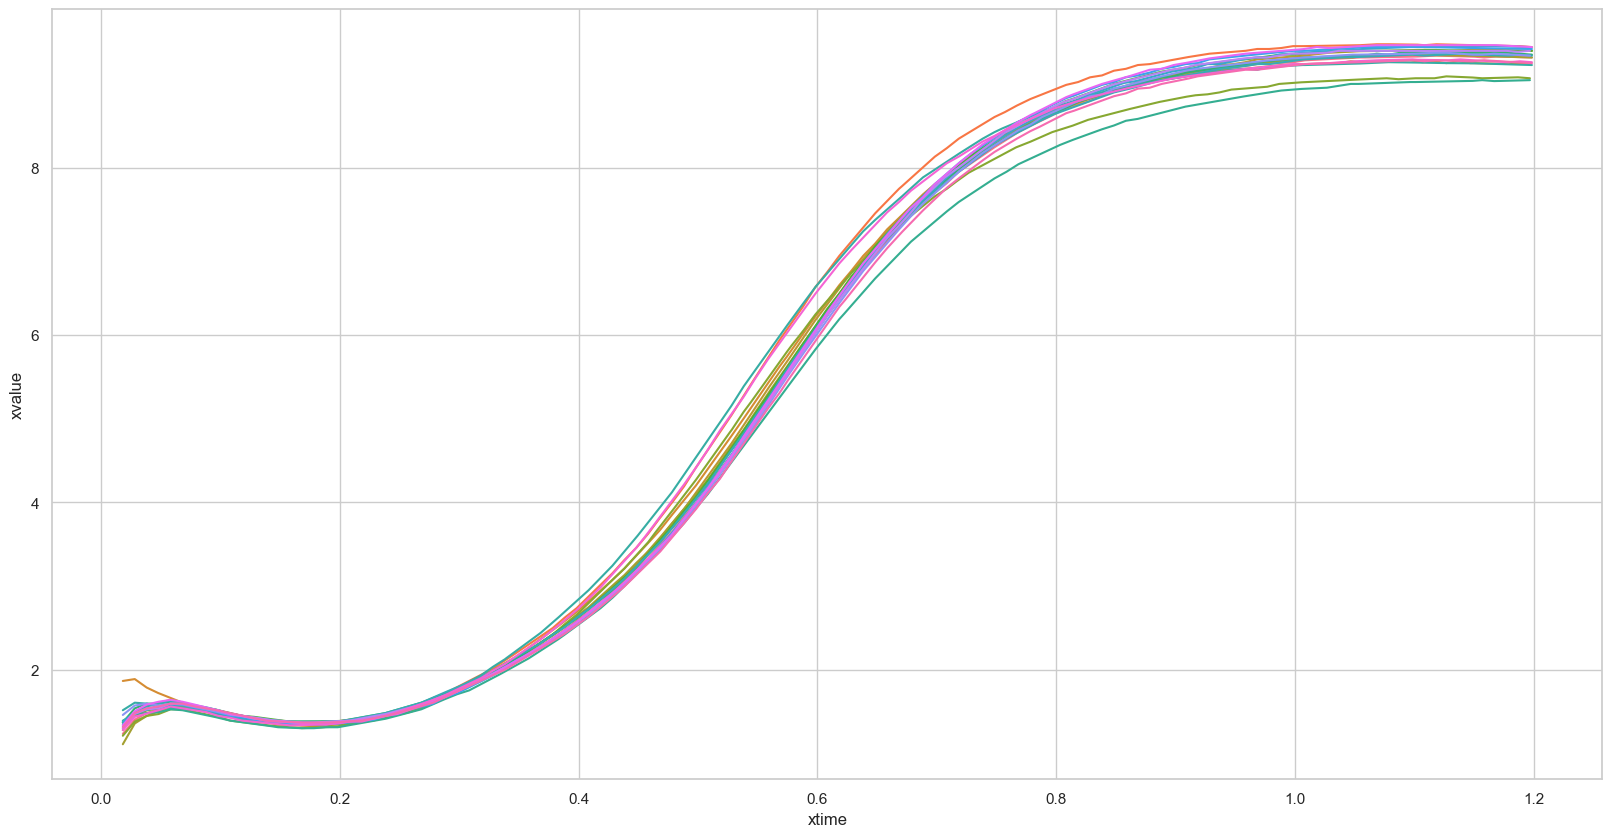

In [5]:
dessiner_commande(df)

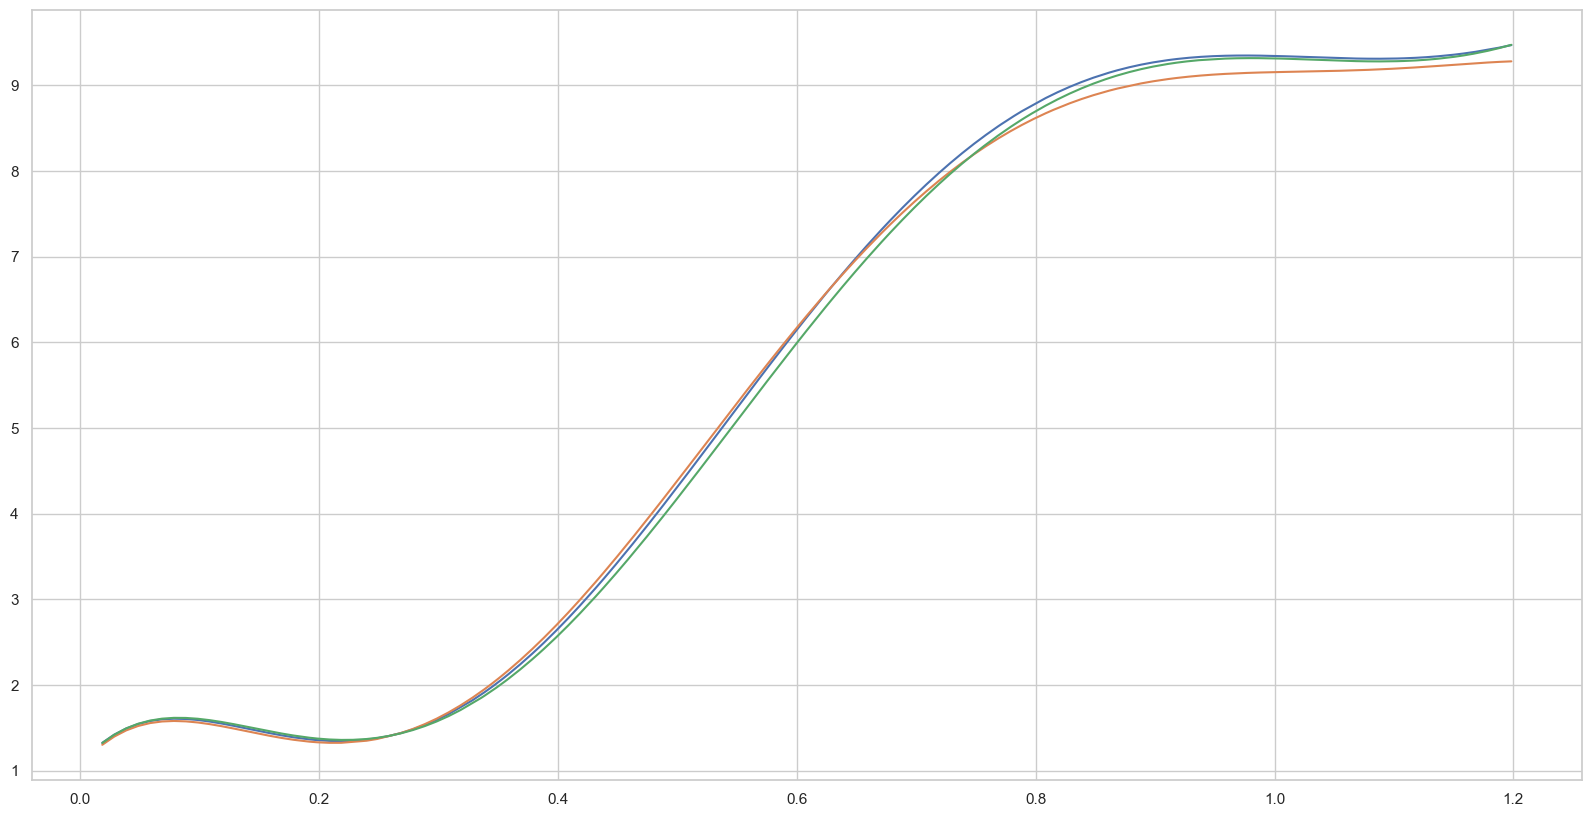

In [6]:
dessiner_commande(df,degree=6)

## Analyse des pentes

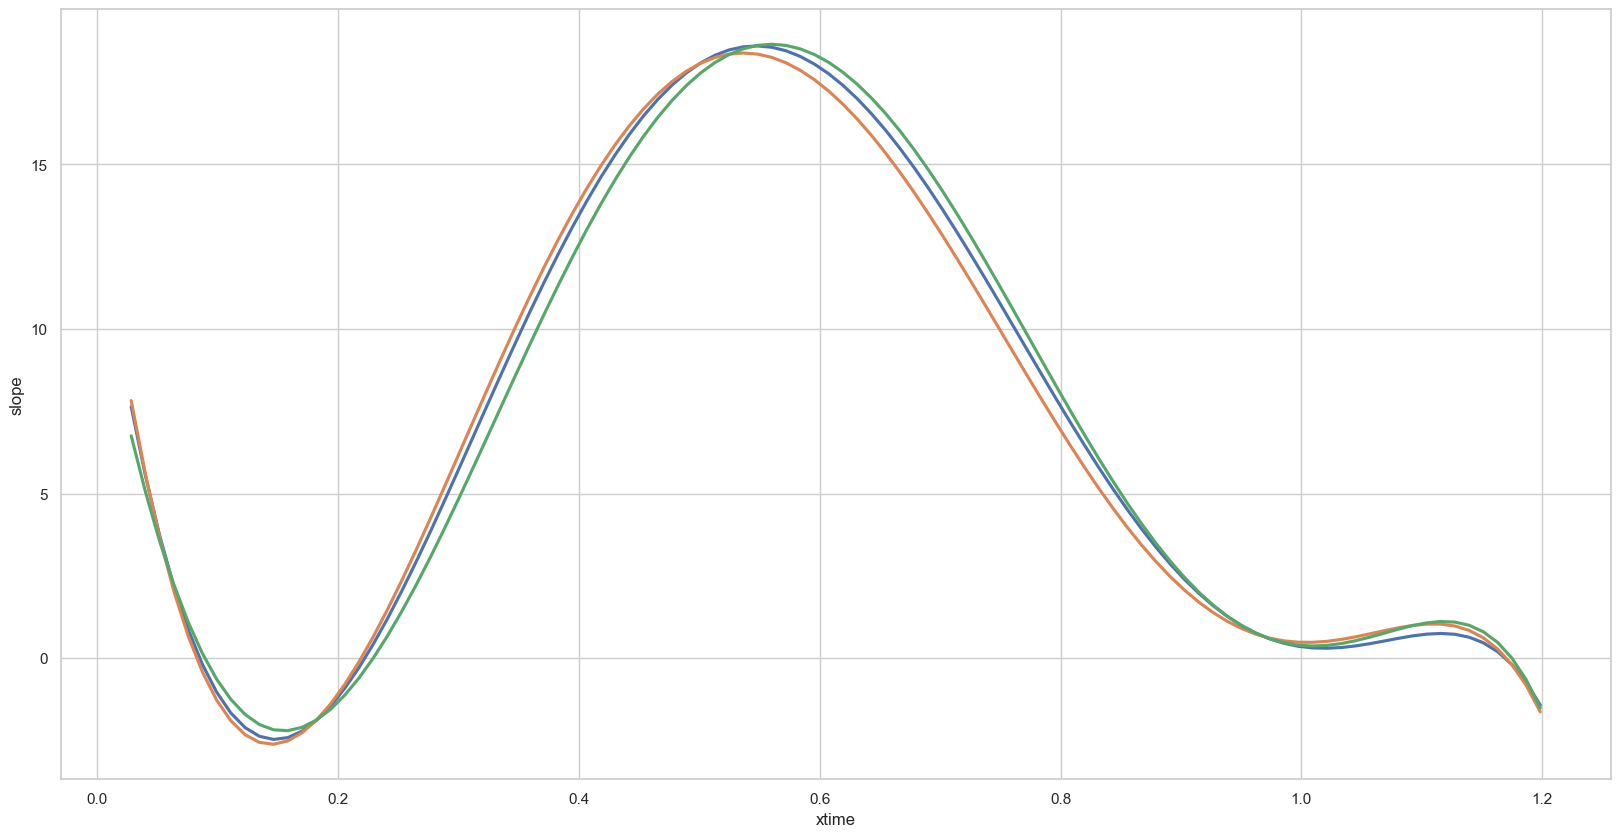

In [7]:
dessiner_commande_slope(df, 6 ,unified=True)

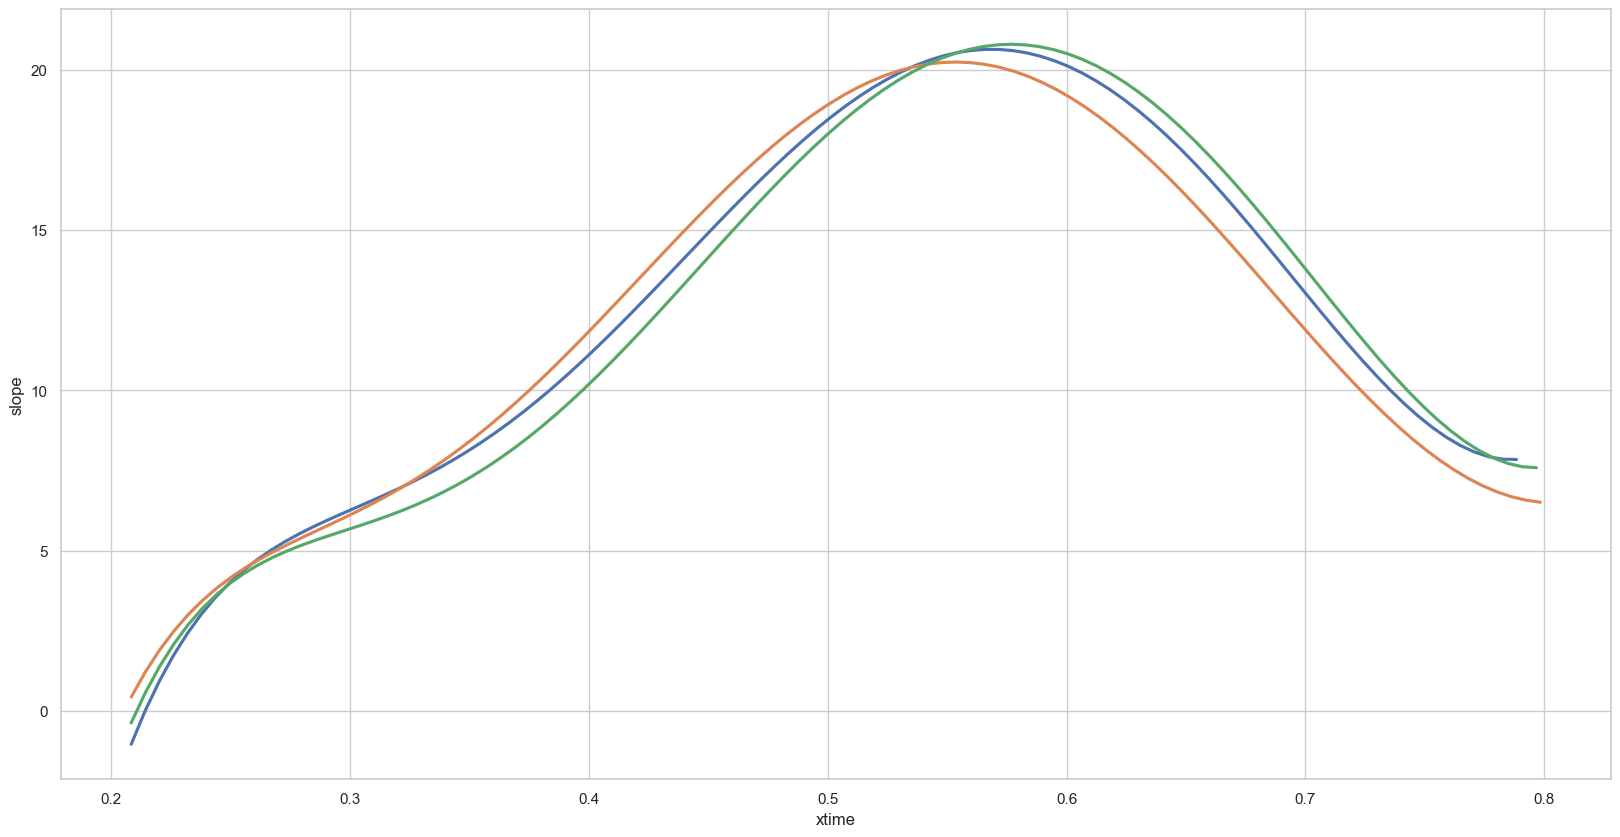

In [8]:
dessiner_commande_slope(df_02_08, 6 ,unified=True)

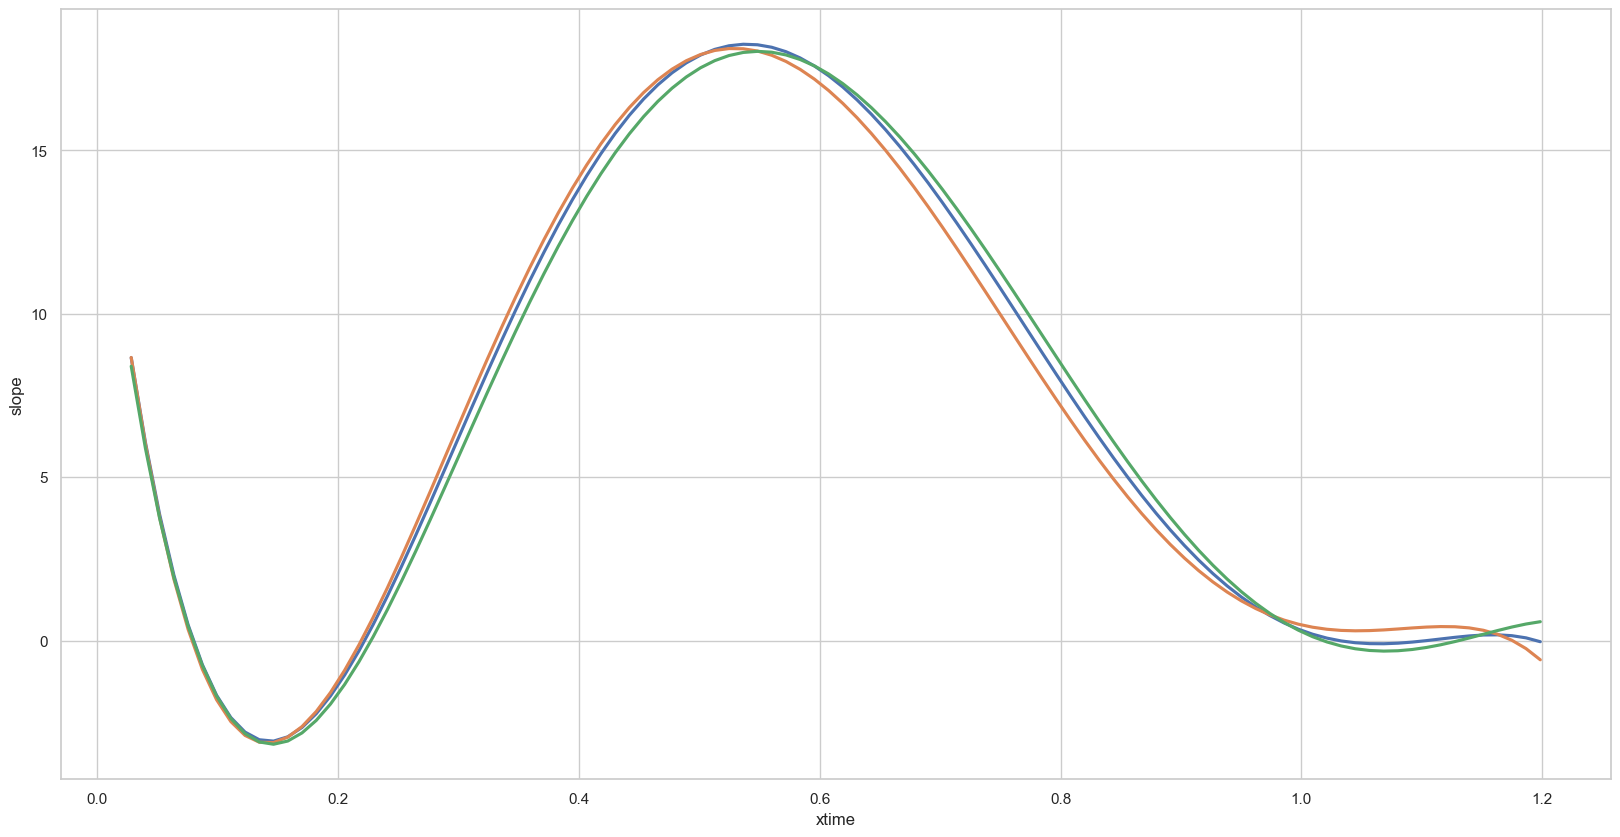

In [9]:
dessiner_commande_slope(df, 5 ,unified=True)

- Batch 164703B: 0.8395993332964363
- Batch 163001B: 0.6795005208859547
- Batch 163902B: 0.4795651897092188


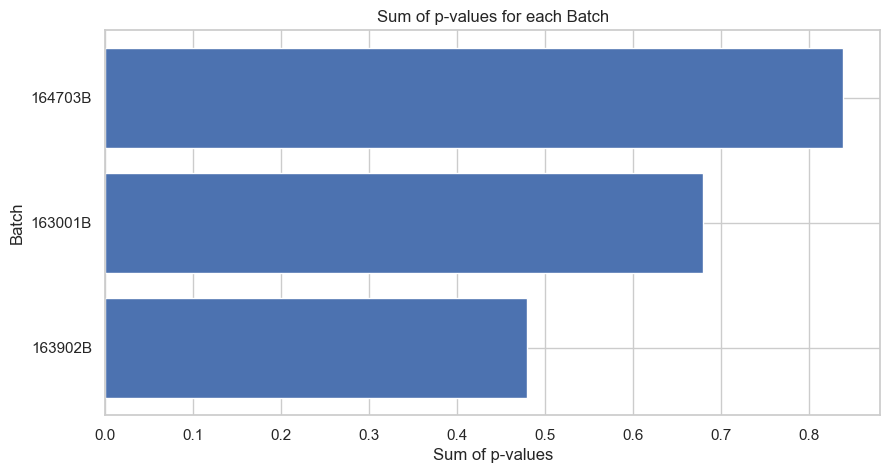

In [21]:
batch_pvalues = ks_test_slope(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

- Batch 164703B: 13.526415064434136
- Batch 163001B: 5.199569338331679
- Batch 163902B: 5.199327777359601


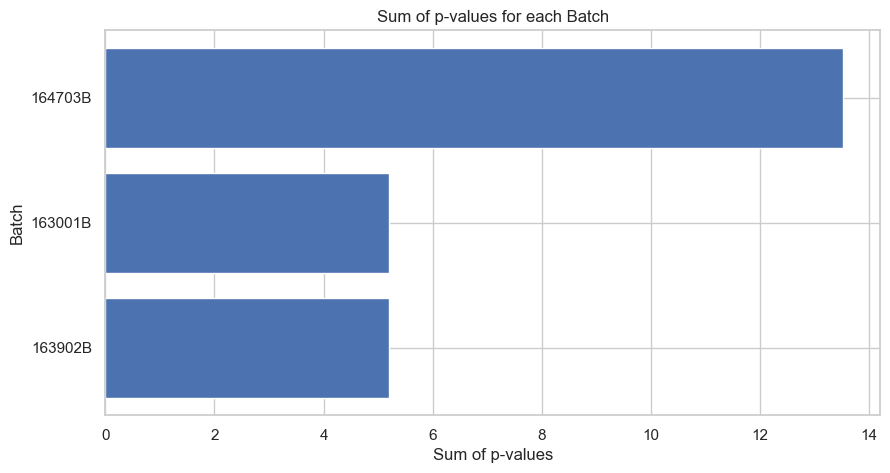

In [16]:
batch_pvalues = ks_test_value(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

In [8]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - median_xtime

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch]*60,3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 164703B est : 0.982 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 163902B est : 0.108 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 163001B est : 0.108 seconde


In [9]:
round(np.std(max_slope_sample_xtime)*1000,2)

18.14

In [10]:
round(np.std(max_slope_batch_xtime)*1000,2)

7.86